In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
pl.rcParams['figure.figsize']=10,8
sns.set_style('whitegrid')

In [3]:
train=pd.read_csv('titanic_train.csv')
test=pd.read_csv('titanic_test.csv')

In [4]:
train.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [5]:
train.shape

(850, 15)

In [6]:
gender_baseline=pd.read_csv('gender_baseline.csv')

In [7]:
train.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

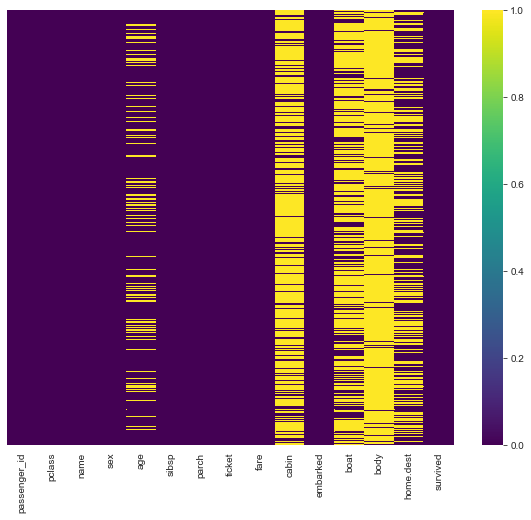

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

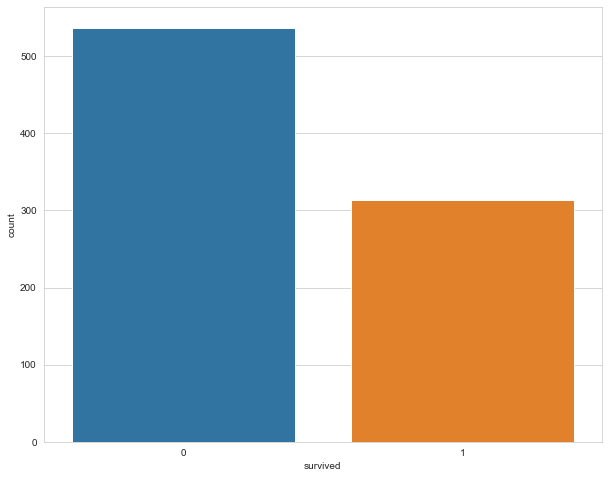

In [9]:
sns.countplot(train['survived'])

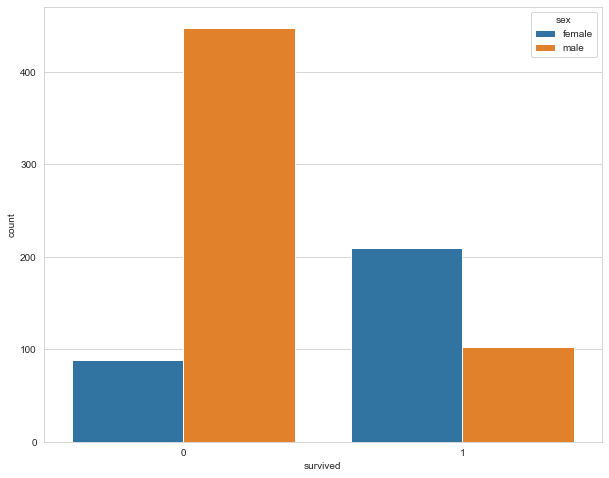

In [10]:
sns.countplot(x='survived',hue='sex',data=train)

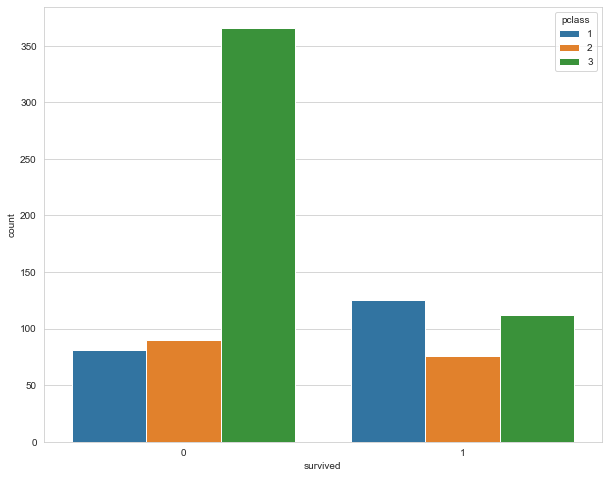

In [11]:
sns.countplot(x='survived',hue='pclass',data=train)

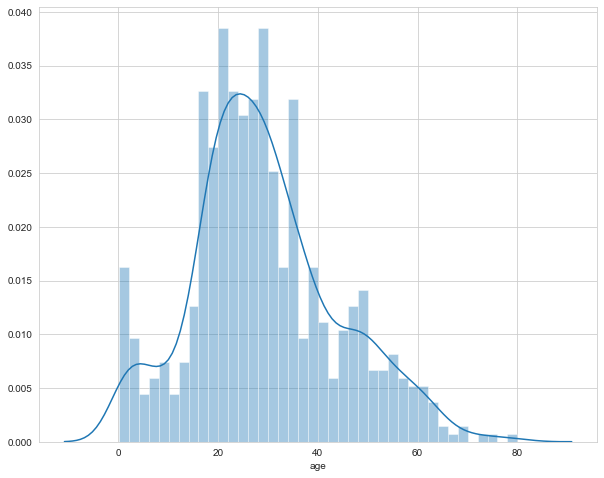

In [12]:
sns.distplot(train['age'].dropna(),bins=40)

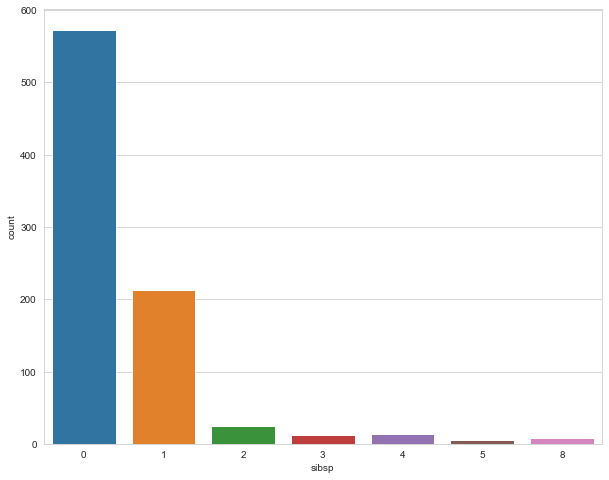

In [13]:
# This shows who have sibling and spouces
sns.countplot(train['sibsp'])

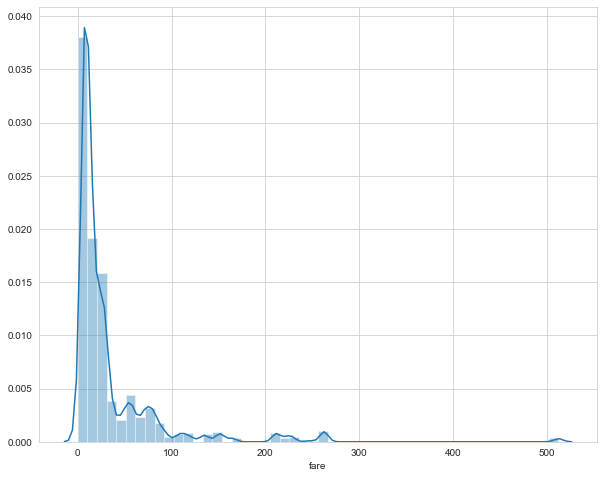

In [14]:
sns.distplot(train['fare'])

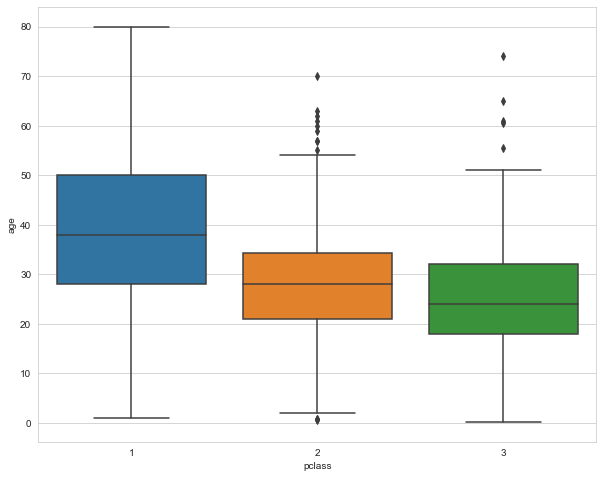

In [15]:
sns.boxplot(data=train,x='pclass',y='age')

In [16]:
def input_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 28
        else:
            return 24
    else:
        return age

In [17]:
train['age']=train[['age','pclass']].apply(input_age,axis=1)

In [18]:
train.drop(['boat','body','home.dest'],axis=1,inplace=True)

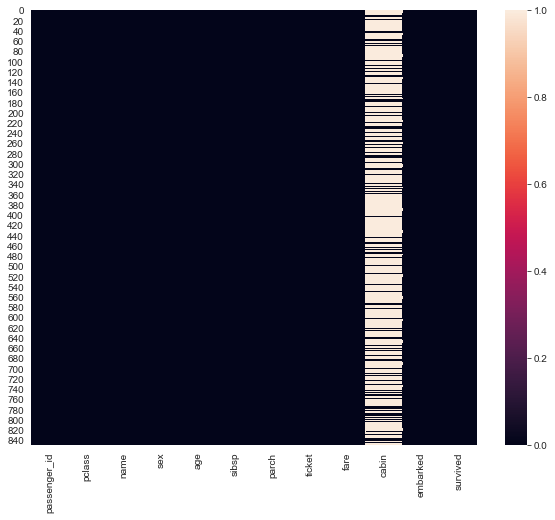

In [19]:
sns.heatmap(train.isnull())

In [20]:
train.drop('cabin',axis=1,inplace=True)

In [21]:
train.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,24.0,0,0,335432,7.7333,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,0


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   embarked      849 non-null    object 
 10  survived      850 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 73.2+ KB


In [23]:
sex=pd.get_dummies(train['sex'],drop_first=True)
embark=pd.get_dummies(train['embarked'],drop_first=True)

In [24]:
train.drop(['sex','embarked','name','ticket'],axis=1,inplace=True)

In [25]:
train

,passenger_id,pclass,age,sibsp,parch,fare,survived
0,1216,3,24.0,0,0,7.7333,1
1,699,3,38.0,0,0,8.6625,0
2,1267,3,30.0,1,1,24.1500,0
3,449,2,54.0,1,3,23.0000,1
4,576,2,40.0,0,0,13.0000,0
...,...,...,...,...,...,...,...
845,158,1,55.0,0,0,50.0000,0
846,174,1,58.0,0,0,29.7000,0
847,467,2,24.0,1,0,26.0000,1
848,1112,3,3.0,1,1,13.7750,0


In [26]:
train=pd.concat([train,sex,embark],axis=1)
train.head()

,passenger_id,pclass,age,sibsp,parch,fare,survived,male,Q,S
0,1216,3,24.0,0,0,7.7333,1,0,1,0
1,699,3,38.0,0,0,8.6625,0,1,0,1
2,1267,3,30.0,1,1,24.1500,0,0,0,1
3,449,2,54.0,1,3,23.0000,1,0,0,1
4,576,2,40.0,0,0,13.0000,0,1,0,1


In [27]:
train.drop('passenger_id',axis=1,inplace=True)

In [28]:
train.dropna(inplace=True)

In [29]:
X_train=train.drop('survived',axis=1)
y_train=train['survived']

In [30]:
X_train.head()

,pclass,age,sibsp,parch,fare,male,Q,S
0,3,24.0,0,0,7.7333,0,1,0
1,3,38.0,0,0,8.6625,1,0,1
2,3,30.0,1,1,24.1500,0,0,1
3,2,54.0,1,3,23.0000,0,0,1
4,2,40.0,0,0,13.0000,1,0,1


In [31]:
y_train.head()

0    1
1    0
2    0
3    1
4    0
Name: survived, dtype: int64

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
X_train.isnull().sum()

pclass    0
age       0
sibsp     0
parch     0
fare      0
male      0
Q         0
S         0
dtype: int64

In [34]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
logreg.score(X_train,y_train)

0.7962308598351001

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
classifier=RandomForestClassifier(random_state=0)

In [38]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [39]:
classifier.score(X_train,y_train)

0.9729093050647821

In [40]:
dec_tree=DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
dec_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [41]:
dec_tree.score(X_train,y_train)

0.9729093050647821

In [42]:
test_data=pd.read_csv('titanic_test.csv')

In [43]:
test_data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,295,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,B,NaN,"Haverford, PA"
1,1150,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN,NaN
2,89,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,NaN,NaN,"Montreal, PQ"
3,1063,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S,NaN,NaN,"Finland Sudbury, ON"
4,1020,3,"Minkoff, Mr. Lazar",male,21.0,0,0,349211,7.8958,NaN,S,NaN,NaN,NaN


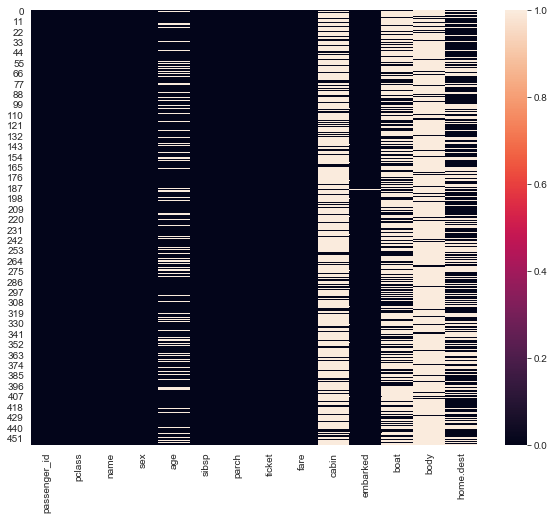

In [44]:
sns.heatmap(test_data.isnull())

In [45]:
test_data.drop(['cabin','boat','body','home.dest'],axis=1,inplace=True)

In [46]:
test_data['age']=test_data[['age','pclass']].apply(input_age,axis=1)

In [47]:
test_data.dropna(inplace=True)

In [48]:
X_train.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'male', 'Q', 'S'], dtype='object')

In [49]:
test_data.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked'],
      dtype='object')

In [50]:
sex_t=pd.get_dummies(test_data['sex'],drop_first=True)
embark_t=pd.get_dummies(test_data['embarked'],drop_first=True)

In [51]:
X_test=test_data[['pclass','age','sibsp','parch','fare']]

In [52]:
X_test=pd.concat([X_test,sex_t,embark_t],axis=1)

In [53]:
X_test.head()

,pclass,age,sibsp,parch,fare,male,Q,S
0,1,17.0,0,2,110.8833,1,0,0
1,3,24.0,0,0,14.5000,1,0,1
2,1,31.0,1,0,52.0000,1,0,1
3,3,41.0,0,0,7.1250,1,0,1
4,3,21.0,0,0,7.8958,1,0,1


In [54]:
def find_best_model(X,y):
    algos={    
           'random_forest' :{
            'model':RandomForestClassifier(),
               'params':{
                   'bootstrap':[True,False],
                   'ccp_alpha':[0.1,0,1,10],
                   'criterion':['gini'],
                   'max_leaf_nodes':[10,100],
                   'n_estimators':[10,100]
               }
            },
               'logistic_regression':{
                   'model':LogisticRegression(),
                   'params':{
                       'C':[0.01,0.1,1,10,100],
                       'fit_intercept':[True,False],
                   }
               },
        'decision_tree':{
               'model':DecisionTreeClassifier(),
               'params':{
                   'criterion':['gini'],
                   'max_depth':[10,100],
                   'splitter':['best','random']
               }
           },
        }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [55]:
find_best_model(X_train,y_train)

,model,best_score,best_params
0,random_forest,0.830588,"{'bootstrap': True, 'ccp_alpha': 0, 'criterion..."
1,logistic_regression,0.777647,"{'C': 10, 'fit_intercept': False}"
2,decision_tree,0.791765,"{'criterion': 'gini', 'max_depth': 10, 'splitt..."


In [56]:
data=pd.concat([X_train,y_train],axis=1)

In [57]:
data

,pclass,age,sibsp,parch,fare,male,Q,S,survived
0,3,24.0,0,0,7.7333,0,1,0,1
1,3,38.0,0,0,8.6625,1,0,1,0
2,3,30.0,1,1,24.1500,0,0,1,0
3,2,54.0,1,3,23.0000,0,0,1,1
4,2,40.0,0,0,13.0000,1,0,1,0
...,...,...,...,...,...,...,...,...,...
845,1,55.0,0,0,50.0000,1,0,1,0
846,1,58.0,0,0,29.7000,1,0,0,0
847,2,24.0,1,0,26.0000,0,0,1,1
848,3,3.0,1,1,13.7750,0,0,1,0


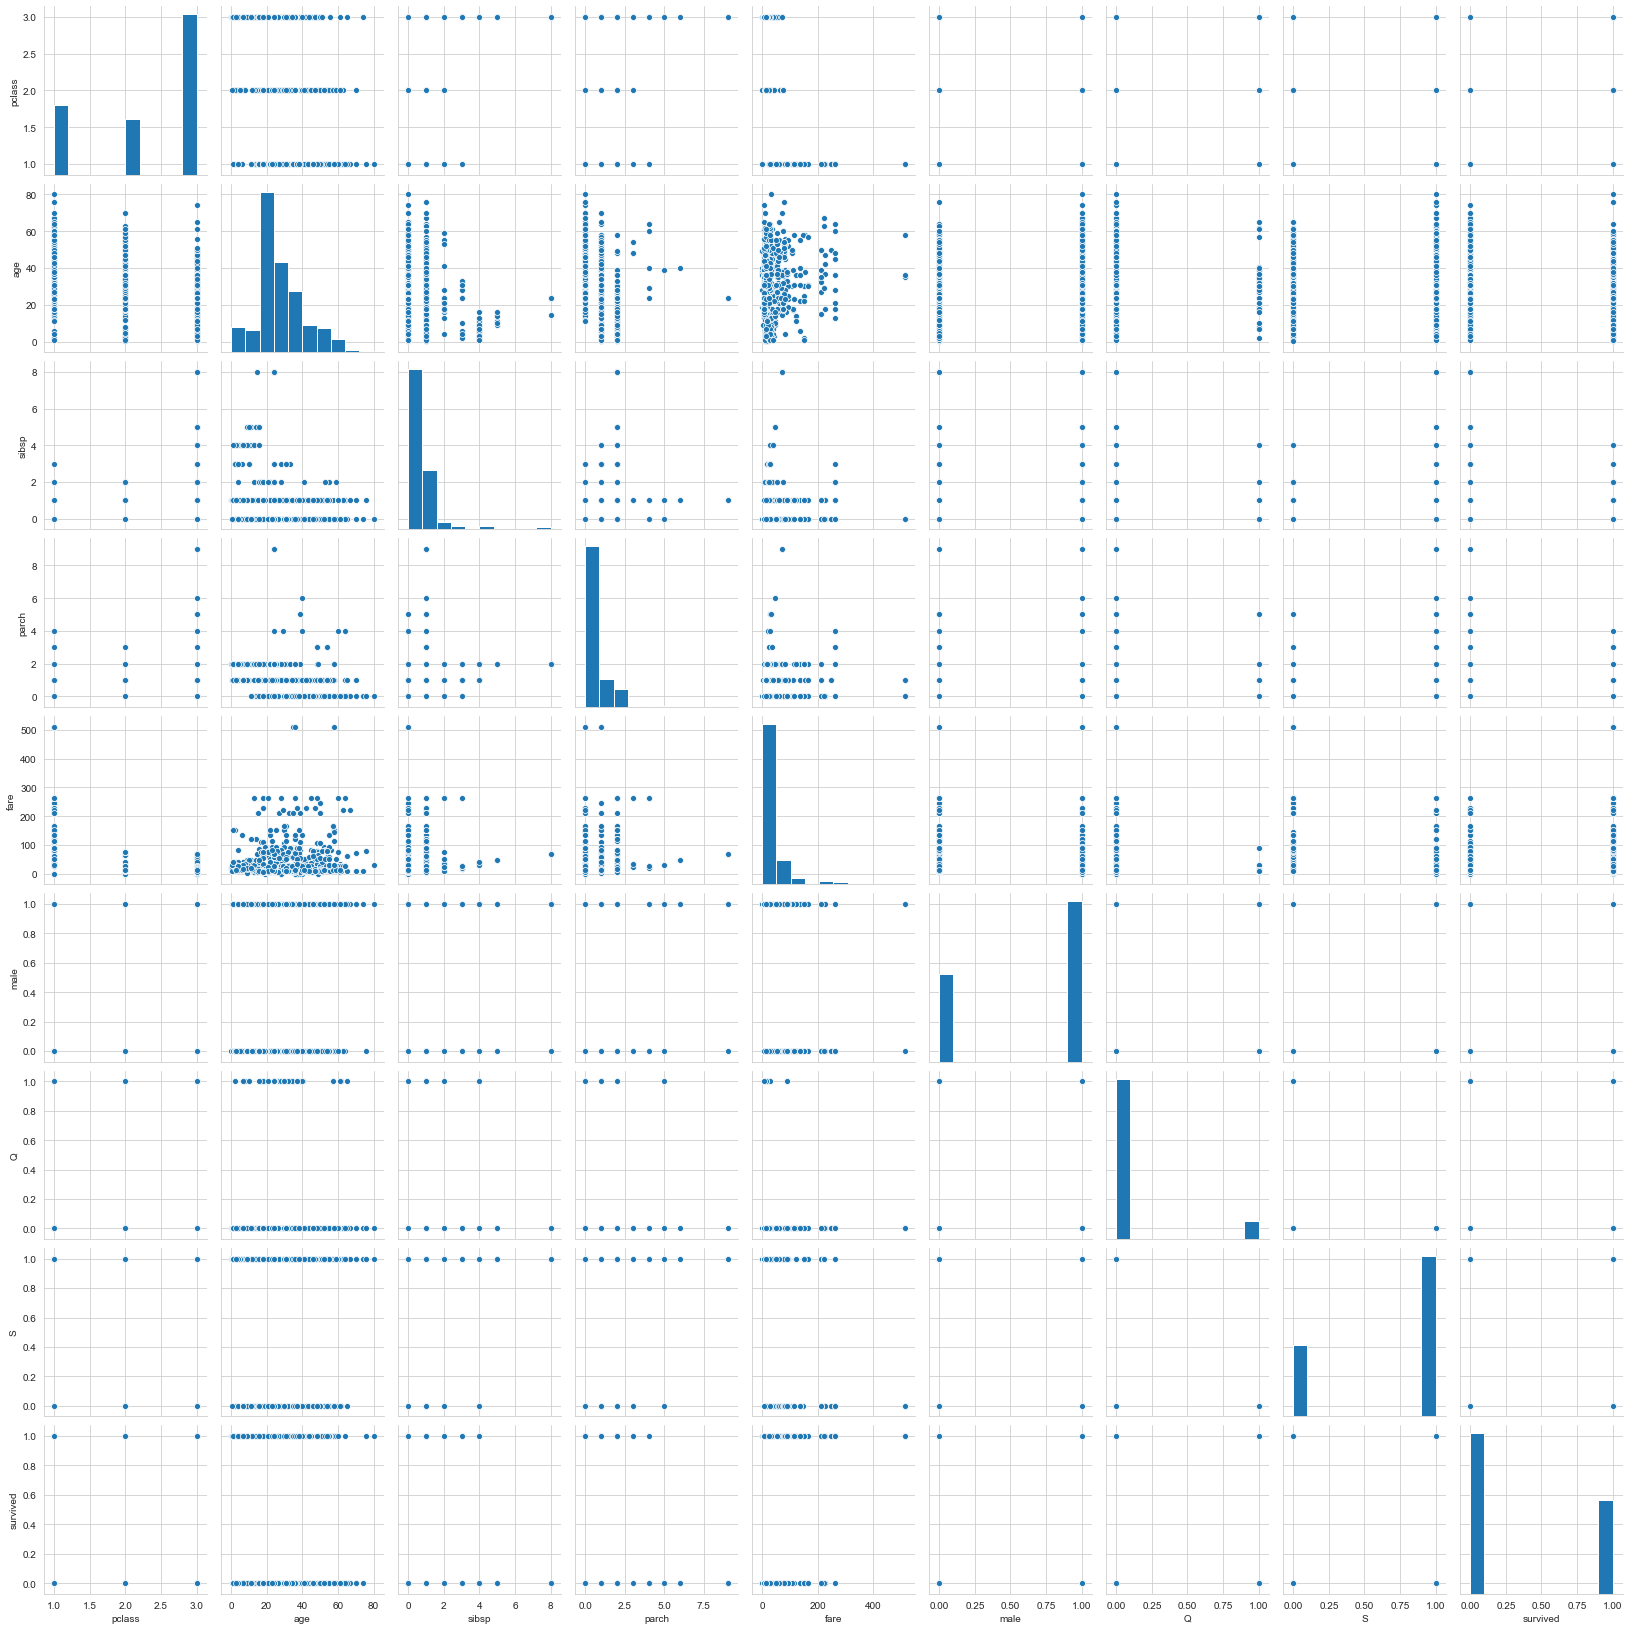

In [58]:
sns.pairplot(data)

In [59]:
data.describe()

,pclass,age,sibsp,parch,fare,male,Q,S,survived
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,2.319199,28.736062,0.522968,0.382803,34.012701,0.647821,0.098940,0.692580,0.368669
std,0.838699,13.176911,1.112643,0.879931,53.705779,0.477931,0.298757,0.461697,0.482728
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,3.000000,25.000000,0.000000,0.000000,14.108300,1.000000,0.000000,1.000000,0.000000
75%,3.000000,36.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [64]:
import sweetviz

,pclass,age,sibsp,parch,fare,male,Q,S
0,3,24.0,0,0,7.7333,0,1,0
1,3,38.0,0,0,8.6625,1,0,1
2,3,30.0,1,1,24.1500,0,0,1
3,2,54.0,1,3,23.0000,0,0,1
4,2,40.0,0,0,13.0000,1,0,1
...,...,...,...,...,...,...,...,...
845,1,55.0,0,0,50.0000,1,0,1
846,1,58.0,0,0,29.7000,1,0,0
847,2,24.0,1,0,26.0000,0,0,1
848,3,3.0,1,1,13.7750,0,0,1


In [84]:
data=X_train.copy()

In [85]:
data['Target']=y_train

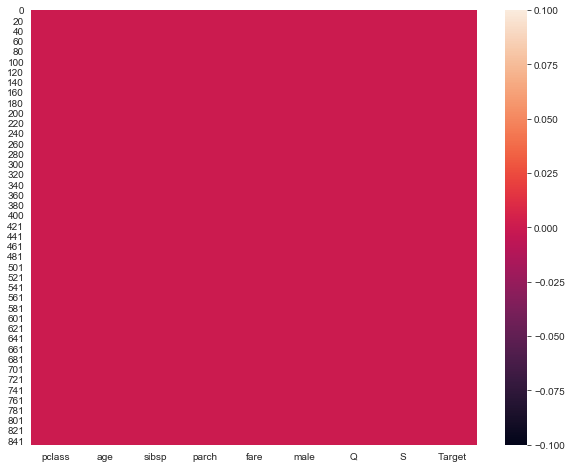

In [86]:
sns.heatmap(data.isnull())

In [87]:
data.head()

,pclass,age,sibsp,parch,fare,male,Q,S,Target
0,3,24.0,0,0,7.7333,0,1,0,1
1,3,38.0,0,0,8.6625,1,0,1,0
2,3,30.0,1,1,24.1500,0,0,1,0
3,2,54.0,1,3,23.0000,0,0,1,1
4,2,40.0,0,0,13.0000,1,0,1,0


In [88]:
myreport=sweetviz.analyze([data,"data"],target_feat='Target')

:FEATURES DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [89]:
myreport.show_html('Report.html')

In [90]:
data.describe()

,pclass,age,sibsp,parch,fare,male,Q,S,Target
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,2.319199,28.736062,0.522968,0.382803,34.012701,0.647821,0.098940,0.692580,0.368669
std,0.838699,13.176911,1.112643,0.879931,53.705779,0.477931,0.298757,0.461697,0.482728
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,3.000000,25.000000,0.000000,0.000000,14.108300,1.000000,0.000000,1.000000,0.000000
75%,3.000000,36.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [91]:
data.head()

,pclass,age,sibsp,parch,fare,male,Q,S,Target
0,3,24.0,0,0,7.7333,0,1,0,1
1,3,38.0,0,0,8.6625,1,0,1,0
2,3,30.0,1,1,24.1500,0,0,1,0
3,2,54.0,1,3,23.0000,0,0,1,1
4,2,40.0,0,0,13.0000,1,0,1,0
